In [22]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Reading Dataset
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
#Getting missing values
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

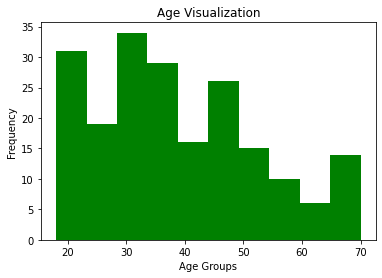

In [25]:
#Visualization of the ages of customers
plt.hist(dataset["Age"], color ="green")
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.title("Age Visualization")
plt.show()

In [26]:
#Counting male and feamle customers
dataset["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0, 0.5, 'Count of people')

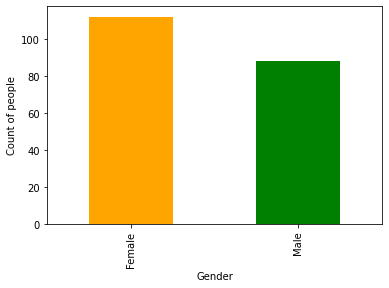

In [27]:
#Gender Visualization
colors =["orange", "green"]
dataset["Gender"].value_counts().plot(kind = "bar", color = colors)
plt.xlabel("Gender")
plt.ylabel("Count of people" )

In [28]:
#Encoding the categorical feature
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


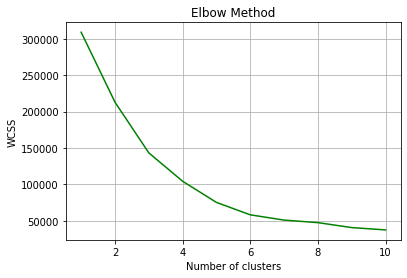

In [29]:
#using the elbow method to find out the number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter= 300, random_state= 0)
    kmeans.fit(dataset.iloc[: , 1:])
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1,11), wcss, color = "green")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [31]:
x =dataset.iloc[: , [3,4]].values

In [32]:
#applying the kmeans on mall dataset
kmeans= KMeans(n_clusters = 5, init ='k-means++', n_init = 10, max_iter = 300, random_state =0)
y_means = kmeans.fit_predict(x)
#y_means

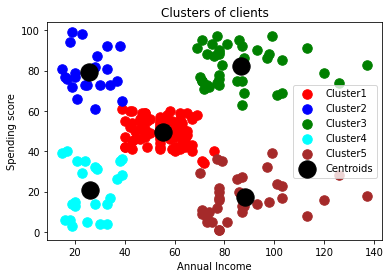

In [33]:
#visualising the kmeans algorithm
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 90, c = 'red', label = 'Cluster1')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 90, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 90, c = 'green', label = 'Cluster3')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s = 90, c = 'cyan', label = 'Cluster4')
plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s = 90, c = 'brown', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label ='Centroids')
plt.title('Clusters of clients')
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()